# XceptionNet_2

### In this notebook I have used Transfer Learning and Fine Tuning to train a CNN on Aptos_2019 Diabetic Retinopathy Data available on Kaggle. The dataset has 3662 images in the training directory. 
### The dataset used for training is cropped, resized and preprocessed by me before passing it to the CNN. Efficient Net gave an average accuracy metric during its 1st trial and I am sure the network can perform much better.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [2]:
from tensorflow.python.keras.applications.xception import Xception

In [3]:
train_dir = "2019/train/train_clahe_gray/"
test_dir = "2019/test/test_clahe_gray/"

In [4]:
model = Xception(input_shape=(160,160,3), include_top = False, weights = "imagenet")

In [5]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 79, 79, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 79, 79, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [6]:
last_layer = model.get_layer("block14_sepconv1_act")
# last_layer = model.output
last = last_layer.output
last.shape

TensorShape([None, 5, 5, 1536])

In [7]:
X = GlobalAveragePooling2D()(last)
# X = Flatten()(last)
X = Dropout(0.3)(X)
X = Dense(128, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
X = Dense(128, activation="relu")(X)
X = BatchNormalization()(X)
final_output = Dense(5, activation="softmax", name="final_output")(X)

In [8]:
final_model = Model(model.input, final_output)

In [9]:
final_model.compile(optimizer = Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 79, 79, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 79, 79, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=30)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(160,160),
                                                    batch_size=16,
                                                    shuffle=True,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(160,160),
                                                  batch_size=16,
                                                  shuffle=True,
                                                  class_mode="categorical")

Found 5387 images belonging to 5 classes.
Found 662 images belonging to 5 classes.


In [13]:
history = final_model.fit(train_generator,
                          epochs=5,
                          steps_per_epoch = 5387//16,
                          validation_data = test_generator,
                          validation_steps = 662//16,
                          verbose=1)
# Weights saved here

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 336 steps, validate for 41 steps
Epoch 1/5
336/336 [==============================] - 1688s 5s/step - loss: 1.4316 - accuracy: 0.4578 - val_loss: 0.8737 - val_accuracy: 0.6555
Epoch 2/5
336/336 [==============================] - 1573s 5s/step - loss: 1.0657 - accuracy: 0.5710 - val_loss: 0.6682 - val_accuracy: 0.7515
Epoch 3/5
336/336 [==============================] - 1560s 5s/step - loss: 0.9133 - accuracy: 0.6325 - val_loss: 0.6638 - val_accuracy: 0.7774
Epoch 4/5
336/336 [==============================] - 1747s 5s/step - loss: 0.8137 - accuracy: 0.6801 - val_loss: 0.6096 - val_accuracy: 0.7881
Epoch 5/5
  2/336 [..............................] - ETA: 37:23 - loss: 0.7170 - accuracy: 0.5625

KeyboardInterrupt: 

In [14]:
final_model.save("2019_3_160_gray_expanded_more_1.h5") # Saved at loss ~ 0.60 and acc ~ 0.79

In [15]:
history = final_model.fit(train_generator,
                          epochs=1,
                          steps_per_epoch = 5387//16,
                          validation_data = test_generator,
                          validation_steps = 662//16,
                          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 336 steps, validate for 41 steps
336/336 [==============================] - 1644s 5s/step - loss: 0.7107 - accuracy: 0.7179 - val_loss: 0.7172 - val_accuracy: 0.7881


In [16]:
final_model.save("2019_3_160_gray_expanded_more_2.h5")

## Predictions on unseen data along with images and labels

In [11]:
final_model.load_weights("2019_3_160_gray_1.h5")

In [12]:
path_test = "TEST_CLAHE/"

In [13]:
testing_datagen = ImageDataGenerator(rescale=1./255.)

In [27]:
testing_generator = testing_datagen.flow_from_directory(path_test, target_size=(160,160), shuffle=True, class_mode="categorical")

Found 23 images belonging to 1 classes.


In [28]:
x,y = testing_generator.next()

In [29]:
predict = final_model.predict(x)
predict

array([[1.79047394e-03, 3.44536675e-05, 9.97248590e-01, 1.50264706e-04,
        7.76145956e-04],
       [7.53557950e-04, 1.77009817e-04, 9.97760177e-01, 2.71457364e-04,
        1.03773689e-03],
       [2.48956750e-03, 1.63186764e-04, 9.96168077e-01, 2.04776952e-04,
        9.74368129e-04],
       [9.84451734e-03, 9.71639991e-01, 1.98042393e-03, 8.30629561e-03,
        8.22877325e-03],
       [1.71447382e-03, 2.56826859e-02, 5.56199984e-06, 7.16599464e-01,
        2.55997747e-01],
       [1.18020677e-03, 6.43070816e-05, 9.97330785e-01, 4.28162253e-04,
        9.96570103e-04],
       [3.77825182e-03, 6.65589944e-02, 1.04734909e-06, 1.12039015e-01,
        8.17622721e-01],
       [4.09715511e-02, 2.11865723e-01, 1.42424598e-01, 5.65471828e-01,
        3.92662175e-02],
       [8.95725284e-03, 3.21673572e-01, 1.97910254e-06, 3.90167683e-02,
        6.30350411e-01],
       [3.71985463e-03, 1.62302575e-03, 9.90164101e-01, 3.02505400e-03,
        1.46790314e-03],
       [2.62719835e-03, 2.1136

In [30]:
predictions = np.argmax(predict, axis=1)
predictions

array([2, 2, 2, 1, 3, 2, 4, 3, 4, 2, 2, 2, 1, 4, 2, 1, 2, 1, 1, 1, 1, 2,
       2], dtype=int64)

In [31]:
arr = ["No_DR","Mild","Moderate","Severe","Proliferative"]

Moderate


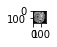

Moderate


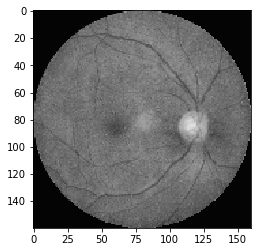

Moderate


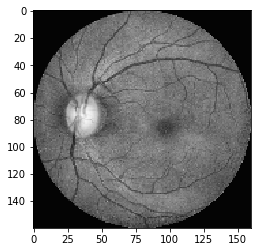

Mild


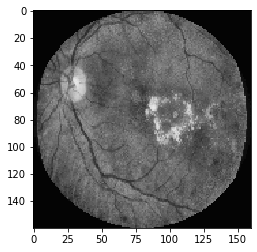

Severe


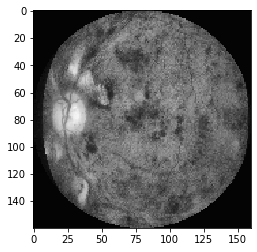

Moderate


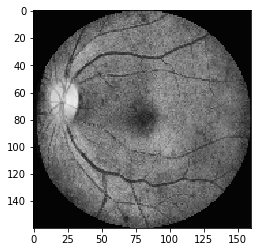

Proliferative


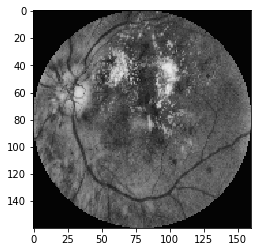

Severe


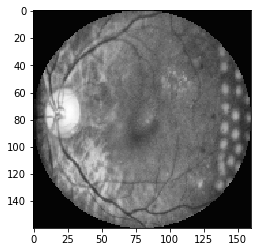

Proliferative


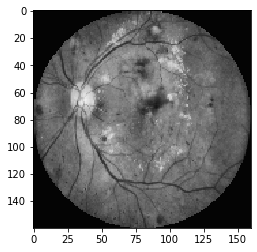

Moderate


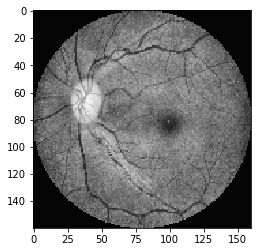

Moderate


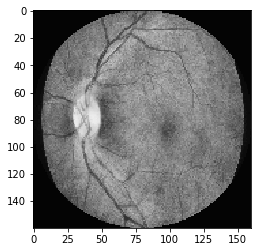

Moderate


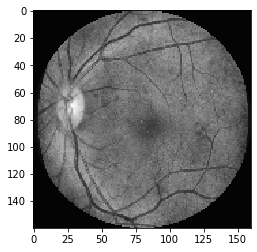

Mild


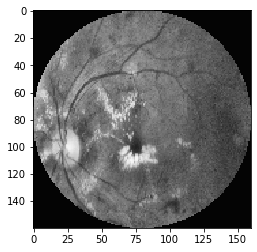

Proliferative


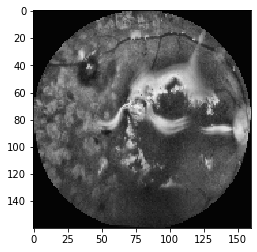

Moderate


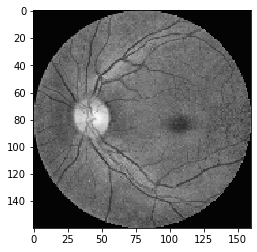

Mild


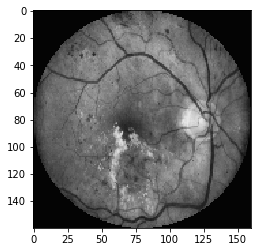

Moderate


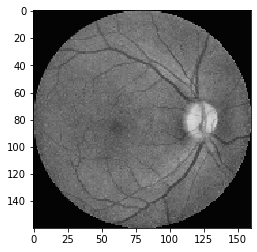

Mild


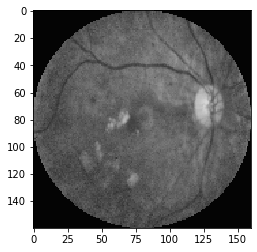

Mild


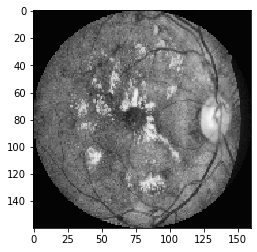

Mild


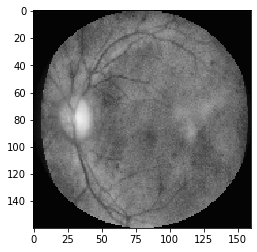

Mild


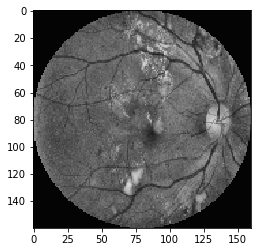

Moderate


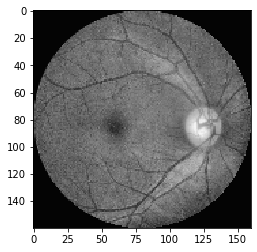

Moderate


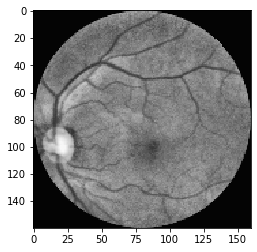

In [33]:
fig = plt.figure()
for i in range(len(x)):
    print(arr[predictions[i]])
    fig.add_subplot(15,2,i+1)
    plt.imshow(x[i])
    plt.show()

# Predictions on unseen data

In [11]:
final_model.load_weights("2019_3_160_gray_expanded_more_1.h5")

In [12]:
test_path = "DR_Classes_Pred/"

In [13]:
testing_datagen = ImageDataGenerator(rescale=1./255.)

#### 0 = Mild
#### 1 = Moderate
#### 2 = No DR
#### 3 = Severe
#### 4 = Proliferative

### No_DR (100%)

In [16]:
testing_generator = testing_datagen.flow_from_directory(test_path+"clahe/", target_size=(160,160), shuffle=True, class_mode="categorical")
predict = final_model.predict(testing_generator)
predictions = np.argmax(predict, axis=1)
print(predictions)
count = 0
for i in predictions:
    if i == 2:
        count += 1
print()
print("Accuracy : ",str(count/len(predictions)))

Found 50 images belonging to 1 classes.
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]

Accuracy :  1.0


### Mild (75%)

In [17]:
testing_generator = testing_datagen.flow_from_directory(test_path+"clahe/", target_size=(160,160), shuffle=True, class_mode="categorical")
predict = final_model.predict(testing_generator)
predictions = np.argmax(predict, axis=1)
print(predictions)
count = 0
for i in predictions:
    if i == 2 or i == 0:
        count += 1
print()
print("Accuracy : ",str(count/len(predictions)))

Found 48 images belonging to 1 classes.
[2 0 0 0 1 0 0 1 2 0 2 0 0 2 2 0 1 0 4 1 1 0 0 1 0 3 1 2 0 0 0 2 0 2 0 1 0
 1 0 0 0 0 1 0 0 0 0 0]

Accuracy :  0.75


### Moderate (40%)

In [19]:
testing_generator = testing_datagen.flow_from_directory(test_path+"clahe/", target_size=(160,160), shuffle=True, class_mode="categorical")
predict = final_model.predict(testing_generator)
predictions = np.argmax(predict, axis=1)
print(predictions)
count = 0
for i in predictions:
    if i == 1 or i == 3:
        count += 1
print()
print("Accuracy : ",str(count/len(predictions)))

Found 48 images belonging to 1 classes.
[1 1 1 4 2 2 2 4 2 2 2 3 2 1 1 1 2 2 1 2 1 2 3 2 2 3 4 2 1 3 2 2 2 1 1 0 1
 2 2 2 2 2 1 1 1 2 2 2]

Accuracy :  0.3958333333333333


### Severe (58%)

In [20]:
testing_generator = testing_datagen.flow_from_directory(test_path+"clahe/", target_size=(160,160), shuffle=True, class_mode="categorical")
predict = final_model.predict(testing_generator)
predictions = np.argmax(predict, axis=1)
print(predictions)
count = 0
for i in predictions:
    if i == 3 or i == 4:
        count += 1
print()
print("Accuracy : ",str(count/len(predictions)))

Found 50 images belonging to 1 classes.
[3 3 2 2 4 4 3 4 4 3 4 3 2 1 2 3 2 4 3 4 1 3 4 4 3 2 2 2 4 2 2 2 4 2 1 2 3
 4 3 2 1 2 3 3 3 3 3 2 3 1]

Accuracy :  0.58


### Proliferative (73%)

In [15]:
testing_generator = testing_datagen.flow_from_directory(test_path+"clahe/", target_size=(160,160), shuffle=True, class_mode="categorical")
predict = final_model.predict(testing_generator)
predictions = np.argmax(predict, axis=1)
print(predictions)
count = 0
for i in predictions:
    if i == 3 or i == 4 :
        count += 1
print()
print("Accuracy : ",str(count/len(predictions)))

Found 49 images belonging to 1 classes.
[4 3 3 2 3 3 4 3 3 4 2 4 4 3 3 3 3 2 3 4 2 3 3 4 4 1 2 1 3 4 4 4 2 2 3 4 3
 3 1 3 1 1 3 3 3 1 3 3 4]

Accuracy :  0.7346938775510204
